# Demo of CMF
Demonstrate CMFPY on neural probe recordings of male rats collected during maze running.
More information about the dataset can be found here: https://crcns.org/data-sets/hc/hc-11 

In [22]:
import matplotlib.pyplot as plt

from cmfpy import CMF 
from cmfpy.utils import sort_neurons, plot_H_components 
from cmfpy.datasets import Maze

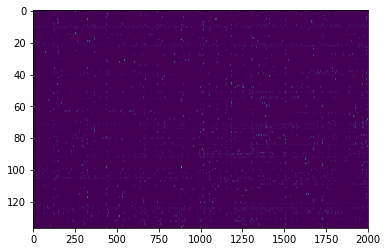

In [23]:
# Generate data
bin_time=0.1
maze_dataset = Maze(path="../../NoveltySessInfoMatFiles/Achilles_10252013_sessInfo.mat",
                    bin_time=bin_time)

data = maze_dataset.generate()
plt.imshow(data, aspect='auto')
plt.show()

## Fit CMF

In [20]:
components=10
lag=100
model = CMF(n_components=components,
            maxlag=lag,
            method='chals',
            l2_scfo=5e-3,
            l1_H=0.1,
            n_iter_max=300,
            tol=1e-6)
model.fit(data);

100%|██████████| 300/300 [1:20:20<00:00, 15.77s/it]


Score:  0.12673448665833242


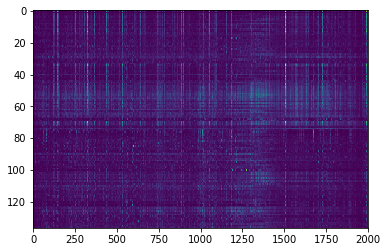

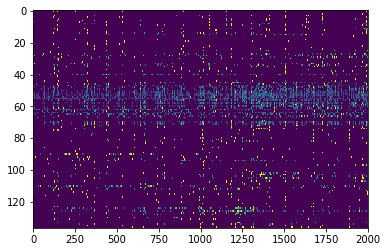

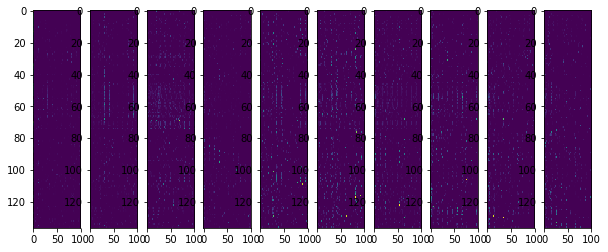

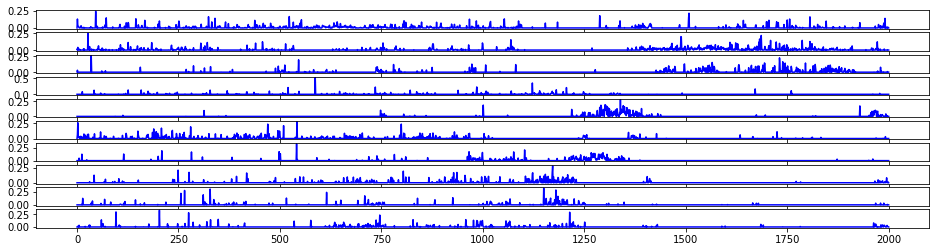

In [21]:
# Compute error, plot temporal components
print('Score: ', model.score(data))

ordering = sort_neurons(model.W)

plt.figure()
plt.imshow(model.predict()[ordering,:], aspect='auto', clim=(0, 0.1))

plt.figure()
plt.imshow(data[ordering,:], aspect='auto', clim=(0, 0.1))

plt.figure(figsize=(10,4))
for i in range(components):
    plt.subplot(1, components, i+1)
    plt.imshow(model.W[:,:,i].T[ordering,:], aspect='auto')

plot_H_components(model.H)
plt.show()